In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os
import kagglehub
from sklearn.preprocessing import LabelEncoder

In [2]:
path = kagglehub.dataset_download("tanlikesmath/the-oxfordiiit-pet-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.48G/1.48G [00:19<00:00, 81.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/versions/1


In [3]:
image_files = glob.glob(os.path.join(path, "images", "*.jpg"))
image_name = [os.path.basename(file) for file in image_files]

In [4]:
print("Sample Image: " , image_name[:5])

Sample Image:  ['pug_124.jpg', 'Bombay_181.jpg', 'yorkshire_terrier_121.jpg', 'Bombay_178.jpg', 'Ragdoll_56.jpg']


In [5]:
len(image_name)

7390

In [6]:
labels = [' '.join(name.rsplit('_', 1)[0].split('_')) for name in image_name]


In [7]:
labels

['pug',
 'Bombay',
 'yorkshire terrier',
 'Bombay',
 'Ragdoll',
 'great pyrenees',
 'yorkshire terrier',
 'pomeranian',
 'pug',
 'Ragdoll',
 'havanese',
 'german shorthaired',
 'Abyssinian',
 'keeshond',
 'basset hound',
 'shiba inu',
 'Russian Blue',
 'Persian',
 'Maine Coon',
 'english setter',
 'newfoundland',
 'great pyrenees',
 'Abyssinian',
 'Maine Coon',
 'basset hound',
 'Sphynx',
 'wheaten terrier',
 'great pyrenees',
 'japanese chin',
 'Sphynx',
 'boxer',
 'american pit bull terrier',
 'boxer',
 'Sphynx',
 'boxer',
 'Abyssinian',
 'leonberger',
 'wheaten terrier',
 'pug',
 'Russian Blue',
 'basset hound',
 'keeshond',
 'chihuahua',
 'pug',
 'newfoundland',
 'Abyssinian',
 'miniature pinscher',
 'keeshond',
 'german shorthaired',
 'great pyrenees',
 'miniature pinscher',
 'basset hound',
 'Egyptian Mau',
 'Sphynx',
 'basset hound',
 'scottish terrier',
 'american bulldog',
 'miniature pinscher',
 'staffordshire bull terrier',
 'Russian Blue',
 'leonberger',
 'shiba inu',
 'min

In [8]:
from collections import Counter
breed_set = {
    ' '.join(os.path.basename(file).rsplit('_', 1)[0].split('_')).lower()
    for file in image_files
}


sorted_breeds = sorted(breed_set)

print(f"Total breeds: {len(sorted_breeds)}")
print("List of breeds:")
for breed in sorted_breeds:
    print(" ",breed)

Total breeds: 37
List of breeds:
  abyssinian
  american bulldog
  american pit bull terrier
  basset hound
  beagle
  bengal
  birman
  bombay
  boxer
  british shorthair
  chihuahua
  egyptian mau
  english cocker spaniel
  english setter
  german shorthaired
  great pyrenees
  havanese
  japanese chin
  keeshond
  leonberger
  maine coon
  miniature pinscher
  newfoundland
  persian
  pomeranian
  pug
  ragdoll
  russian blue
  saint bernard
  samoyed
  scottish terrier
  shiba inu
  siamese
  sphynx
  staffordshire bull terrier
  wheaten terrier
  yorkshire terrier


In [9]:
breed_list = [
    'abyssinian', 'american bulldog', 'american pit bull terrier', 'basset hound',
    'beagle', 'bengal', 'birman', 'bombay', 'boxer', 'british shorthair', 'chihuahua',
    'egyptian mau', 'english cocker spaniel', 'english setter', 'german shorthaired',
    'great pyrenees', 'havanese', 'japanese chin', 'keeshond', 'leonberger',
    'maine coon', 'miniature pinscher', 'newfoundland', 'persian', 'pomeranian',
    'pug', 'ragdoll', 'russian blue', 'saint bernard', 'samoyed', 'scottish terrier',
    'shiba inu', 'siamese', 'sphynx', 'staffordshire bull terrier',
    'wheaten terrier', 'yorkshire terrier'
]

def label_encoder(label):
    label = label.lower()

    if label == 'abyssinian':
        return 0
    elif label == 'american bulldog':
        return 1
    elif label == 'american pit bull terrier':
        return 2
    elif label == 'basset hound':
        return 3
    elif label == 'beagle':
        return 4
    elif label == 'bengal':
        return 5
    elif label == 'birman':
        return 6
    elif label == 'bombay':
        return 7
    elif label == 'boxer':
        return 8
    elif label == 'british shorthair':
        return 9
    elif label == 'chihuahua':
        return 10
    elif label == 'egyptian mau':
        return 11
    elif label == 'english cocker spaniel':
        return 12
    elif label == 'english setter':
        return 13
    elif label == 'german shorthaired':
        return 14
    elif label == 'great pyrenees':
        return 15
    elif label == 'havanese':
        return 16
    elif label == 'japanese chin':
        return 17
    elif label == 'keeshond':
        return 18
    elif label == 'leonberger':
        return 19
    elif label == 'maine coon':
        return 20
    elif label == 'miniature pinscher':
        return 21
    elif label == 'newfoundland':
        return 22
    elif label == 'persian':
        return 23
    elif label == 'pomeranian':
        return 24
    elif label == 'pug':
        return 25
    elif label == 'ragdoll':
        return 26
    elif label == 'russian blue':
        return 27
    elif label == 'saint bernard':
        return 28
    elif label == 'samoyed':
        return 29
    elif label == 'scottish terrier':
        return 30
    elif label == 'shiba inu':
        return 31
    elif label == 'siamese':
        return 32
    elif label == 'sphynx':
        return 33
    elif label == 'staffordshire bull terrier':
        return 34
    elif label == 'wheaten terrier':
        return 35
    elif label == 'yorkshire terrier':
        return 36
    else:
        return -1



In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
features = []
labels = []
IMAGE_SIZE = (224, 224)
images_fp = os.path.join(path, "images")

for name in image_name:
    label = ' '.join(name.split('_')[:-1])
    label_encoded = label_encoder(label)

    if label_encoded != -1:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype='uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        labels.append(label_encoded)


In [12]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [13]:
labels

[25,
 7,
 36,
 7,
 26,
 15,
 36,
 24,
 25,
 26,
 16,
 14,
 0,
 18,
 3,
 31,
 27,
 23,
 20,
 13,
 22,
 15,
 0,
 20,
 3,
 33,
 35,
 15,
 17,
 33,
 8,
 2,
 8,
 33,
 8,
 0,
 19,
 35,
 25,
 27,
 3,
 18,
 10,
 25,
 22,
 0,
 21,
 18,
 14,
 15,
 21,
 3,
 11,
 33,
 3,
 30,
 1,
 21,
 34,
 27,
 19,
 31,
 21,
 33,
 29,
 28,
 11,
 35,
 20,
 16,
 16,
 27,
 0,
 10,
 18,
 29,
 30,
 16,
 29,
 3,
 14,
 31,
 20,
 35,
 5,
 17,
 25,
 0,
 0,
 2,
 9,
 22,
 12,
 10,
 23,
 26,
 14,
 13,
 28,
 8,
 2,
 23,
 12,
 6,
 33,
 30,
 9,
 21,
 8,
 0,
 36,
 5,
 35,
 33,
 0,
 13,
 27,
 23,
 16,
 19,
 17,
 25,
 11,
 18,
 18,
 30,
 10,
 6,
 1,
 17,
 12,
 15,
 33,
 25,
 18,
 13,
 9,
 10,
 18,
 13,
 0,
 3,
 17,
 16,
 25,
 32,
 23,
 36,
 22,
 4,
 25,
 31,
 25,
 19,
 17,
 30,
 31,
 7,
 14,
 24,
 4,
 24,
 25,
 30,
 17,
 36,
 28,
 28,
 15,
 17,
 35,
 19,
 34,
 36,
 27,
 32,
 17,
 33,
 19,
 6,
 13,
 35,
 22,
 16,
 25,
 1,
 8,
 8,
 22,
 20,
 18,
 13,
 20,
 12,
 32,
 7,
 28,
 17,
 4,
 23,
 20,
 25,
 13,
 26,
 27,
 10,
 3,
 19,
 24,
 

In [14]:
features_array = np.array(features)
labels_array = np.array(labels)

In [15]:
labels_one_hot = pd.get_dummies(labels_array).astype(int)

In [16]:
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7388,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2, random_state = 42)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.25, random_state=1)

In [29]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as ppi
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [30]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0.2)])

In [44]:
prediction_layers = Dense(37, activation = 'softmax')

In [45]:
resnet_model = ResNet50(include_top= False, pooling = 'avg', weights='imagenet')
resnet_model.trainable = False
preprocess_input = ppi

Build Model


In [46]:
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training = False )
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [47]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [49]:
model_history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), epochs = 10)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1036s 7s/step - accuracy: 0.5098 - loss: 1.7421 - val_accuracy: 0.8667 - val_loss: 0.5066
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1031s 7s/step - accuracy: 0.7597 - loss: 0.8091 - val_accuracy: 0.8687 - val_loss: 0.4506
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1044s 7s/step - accuracy: 0.8033 - loss: 0.6458 - val_accuracy: 0.8721 - val_loss: 0.3954
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1028s 7s/step - accuracy: 0.8348 - loss: 0.5014 - val_accuracy: 0.8870 - val_loss: 0.3667
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.8547 - loss: 0.4483 - val_accuracy: 0.8674 - val_loss: 0.4179
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.8823 - loss: 0.3969 - val_accuracy: 0.8965 - val_loss: 0.3490
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1032s 7s/step - accuracy: 0.8901 - loss: 0.3648 - val_accuracy: 0.8884 - val_loss: 0.3367
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.8810 - loss: 0.3589 - 

In [50]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

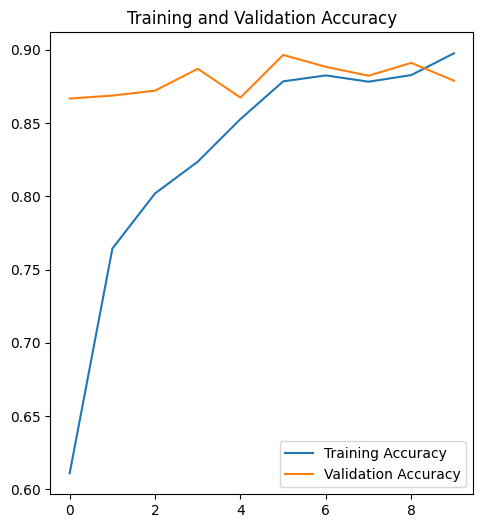

In [55]:
epochs_range = range(10)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


Text(0.5, 1.0, 'Training and Validation Loss')

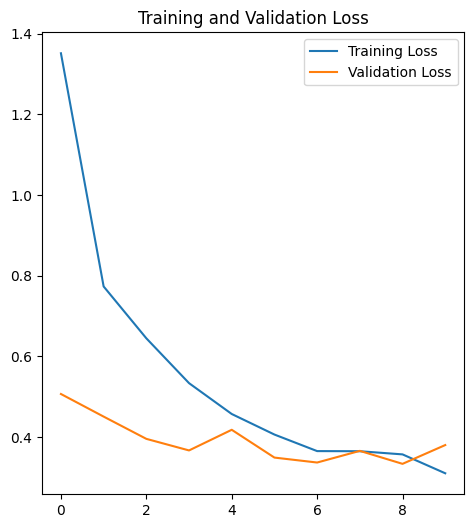

In [56]:

epochs_range = range(10)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [60]:
model.evaluate(X_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.8681 - loss: 0.4053


[0.3881658911705017, 0.8761840462684631]

In [58]:
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step


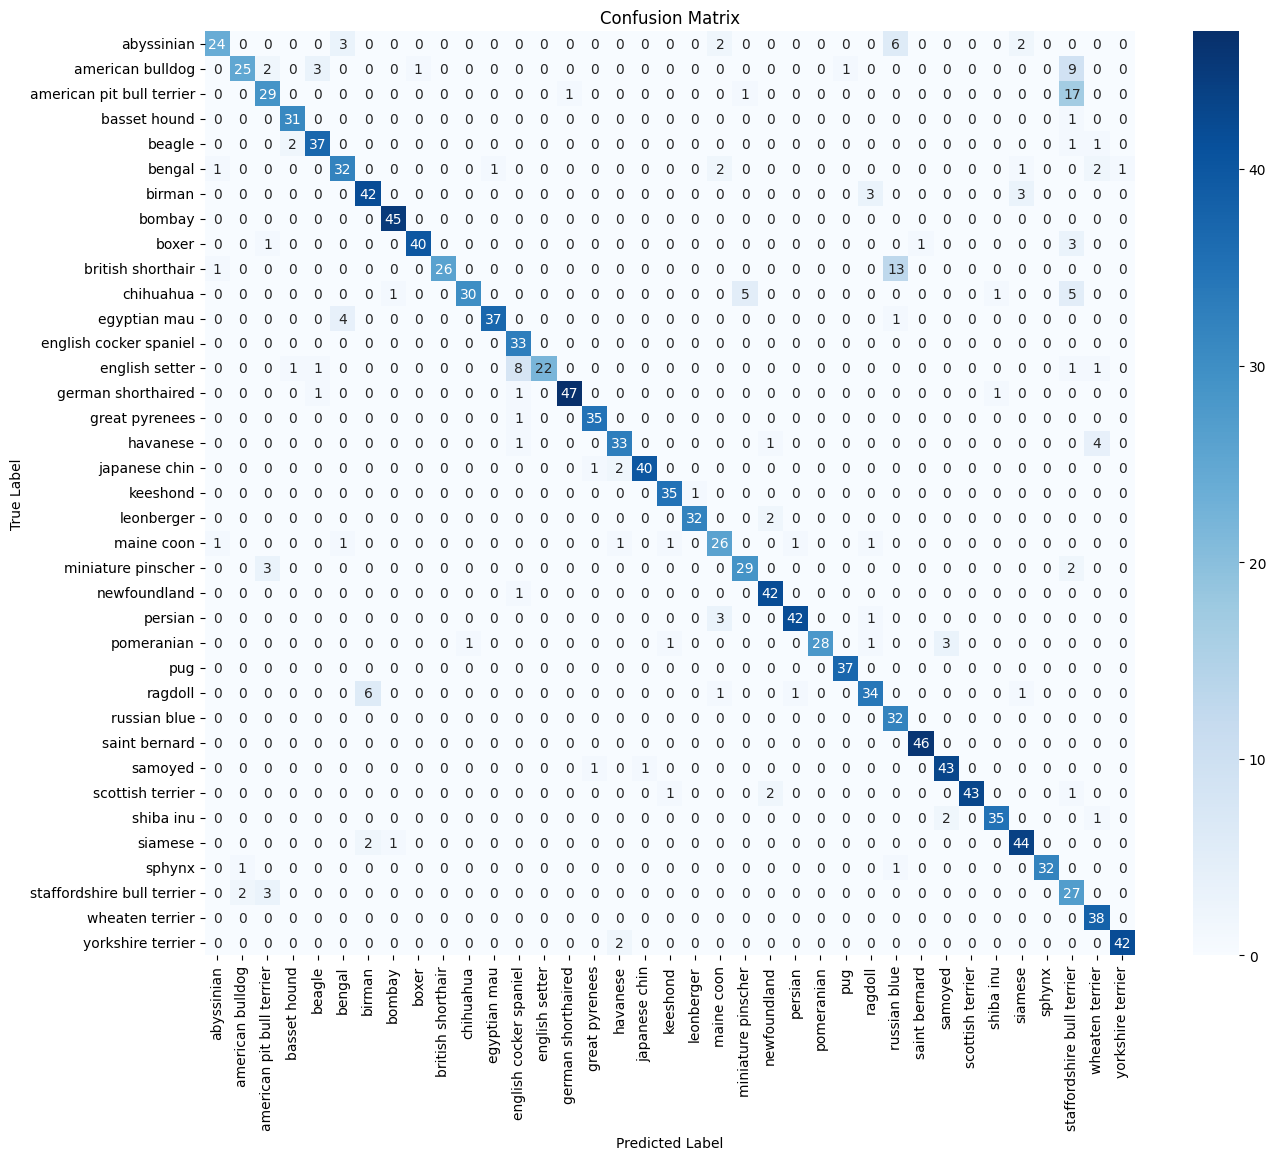

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test.values, axis=1)

# Convert predicted probabilities into  the class labels
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breed_list, yticklabels=breed_list)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()